In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from focal_loss import BinaryFocalLoss
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [82]:
smooth = 1.
# def dice_coef(y_true, y_pred, const=K.epsilon()):
#     '''
#     Sørensen–Dice coefficient for 2-d samples.
    
#     Input
#     ----------
#         y_true, y_pred: predicted outputs and targets.
#         const: a constant that smooths the loss gradient and reduces numerical instabilities.
        
#     '''
    
#     # flatten 2-d tensors
#     y_true_pos = tf.reshape(y_true, [-1])
#     y_pred_pos = tf.reshape(y_pred, [-1])
    
#     # get true pos (TP), false neg (FN), false pos (FP).
#     true_pos  = tf.reduce_sum(y_true_pos * y_pred_pos)
#     false_neg = tf.reduce_sum(y_true_pos * (1-y_pred_pos))
#     false_pos = tf.reduce_sum((1-y_true_pos) * y_pred_pos)
    
#     # 2TP/(2TP+FP+FN) == 2TP/()
#     coef_val = (2.0 * true_pos + const)/(2.0 * true_pos + false_pos + false_neg)
    
#     return coef_val



# def dice(y_true, y_pred, const=K.epsilon()):

#     # tf tensor casting
#     y_pred = tf.convert_to_tensor(y_pred)
#     y_true = tf.cast(y_true, y_pred.dtype)

#     # <--- squeeze-out length-1 dimensions.
#     y_pred = tf.squeeze(y_pred)
#     y_true = tf.squeeze(y_true)

#     loss_val = 1 - dice_coef(y_true, y_pred, const=const)

#     return loss_val
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.softmax(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator



path_to_model = '/Users/salvatoreesposito/Desktop/models/AttXnet_1'
model = tf.keras.models.load_model(path_to_model, custom_objects={"dice_loss":dice_loss, "dice_coef":dice_coef})

# model = tf.keras.models.load_model(path_to_model, custom_objects={'dice':dice, "dice_coef":dice_coef})
# model = tf.keras.models.load_model(path_to_model, custom_objects={"dice_coef":dice_coef})

In [83]:
# model_builder = model
model.summary()


Model: "AttU_enc"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
encoder_stage0-0_conv1 (Conv2D) (None, 512, 512, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
encoder_stage0-0_bn1 (BatchNorm (None, 512, 512, 32) 128         encoder_stage0-0_conv1[0][0]     
__________________________________________________________________________________________________
encoder_stage0-0_relu1 (Activat (None, 512, 512, 32) 0           encoder_stage0-0_bn1[0][0]       
___________________________________________________________________________________________

In [84]:
import pickle
with open('train.pickle', 'rb') as f:
    X, y = pickle.load(f)

In [85]:
from sklearn.model_selection import train_test_split

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
X_test[3].shape
# np.expand_dims(X_test[3], axis=0).shape
image_mask_predictions=model.predict(np.expand_dims(X_test[599], axis=0))
image_mask_predictions.shape

(1, 512, 512, 7)

Text(0.5, 1.0, 'Prediction')

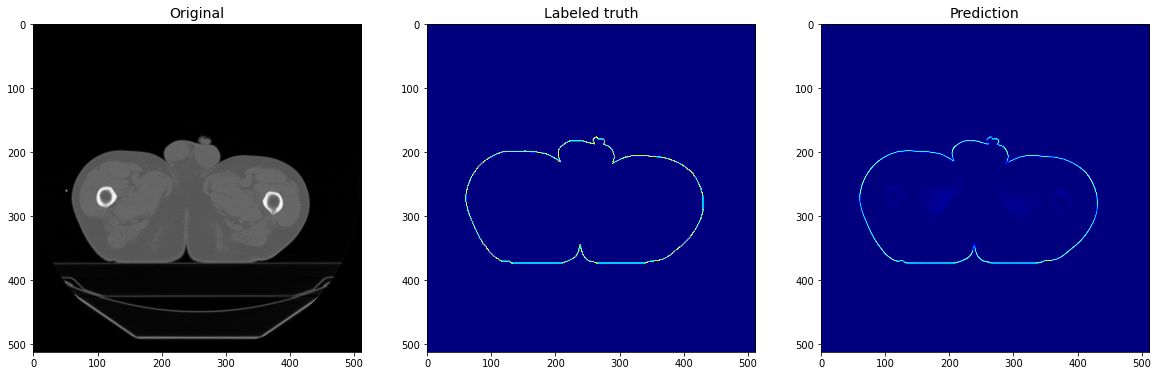

In [109]:
fig, ax = plt.subplots(1,3, figsize=[20,10])
ax = ax.flatten()
ax[0].imshow(X_test[599],cmap=plt.cm.gray)
ax[1].imshow(y_test[599],cmap=plt.cm.jet)
ax[2].imshow(image_mask_predictions[0][:,:,1],cmap=plt.cm.jet)


# image_mask_predictions=model.predict(X_test[1])
ax[0].set_title("Original", fontsize=14)
ax[1].set_title("Labeled truth", fontsize=14)
ax[2].set_title("Prediction", fontsize=14)

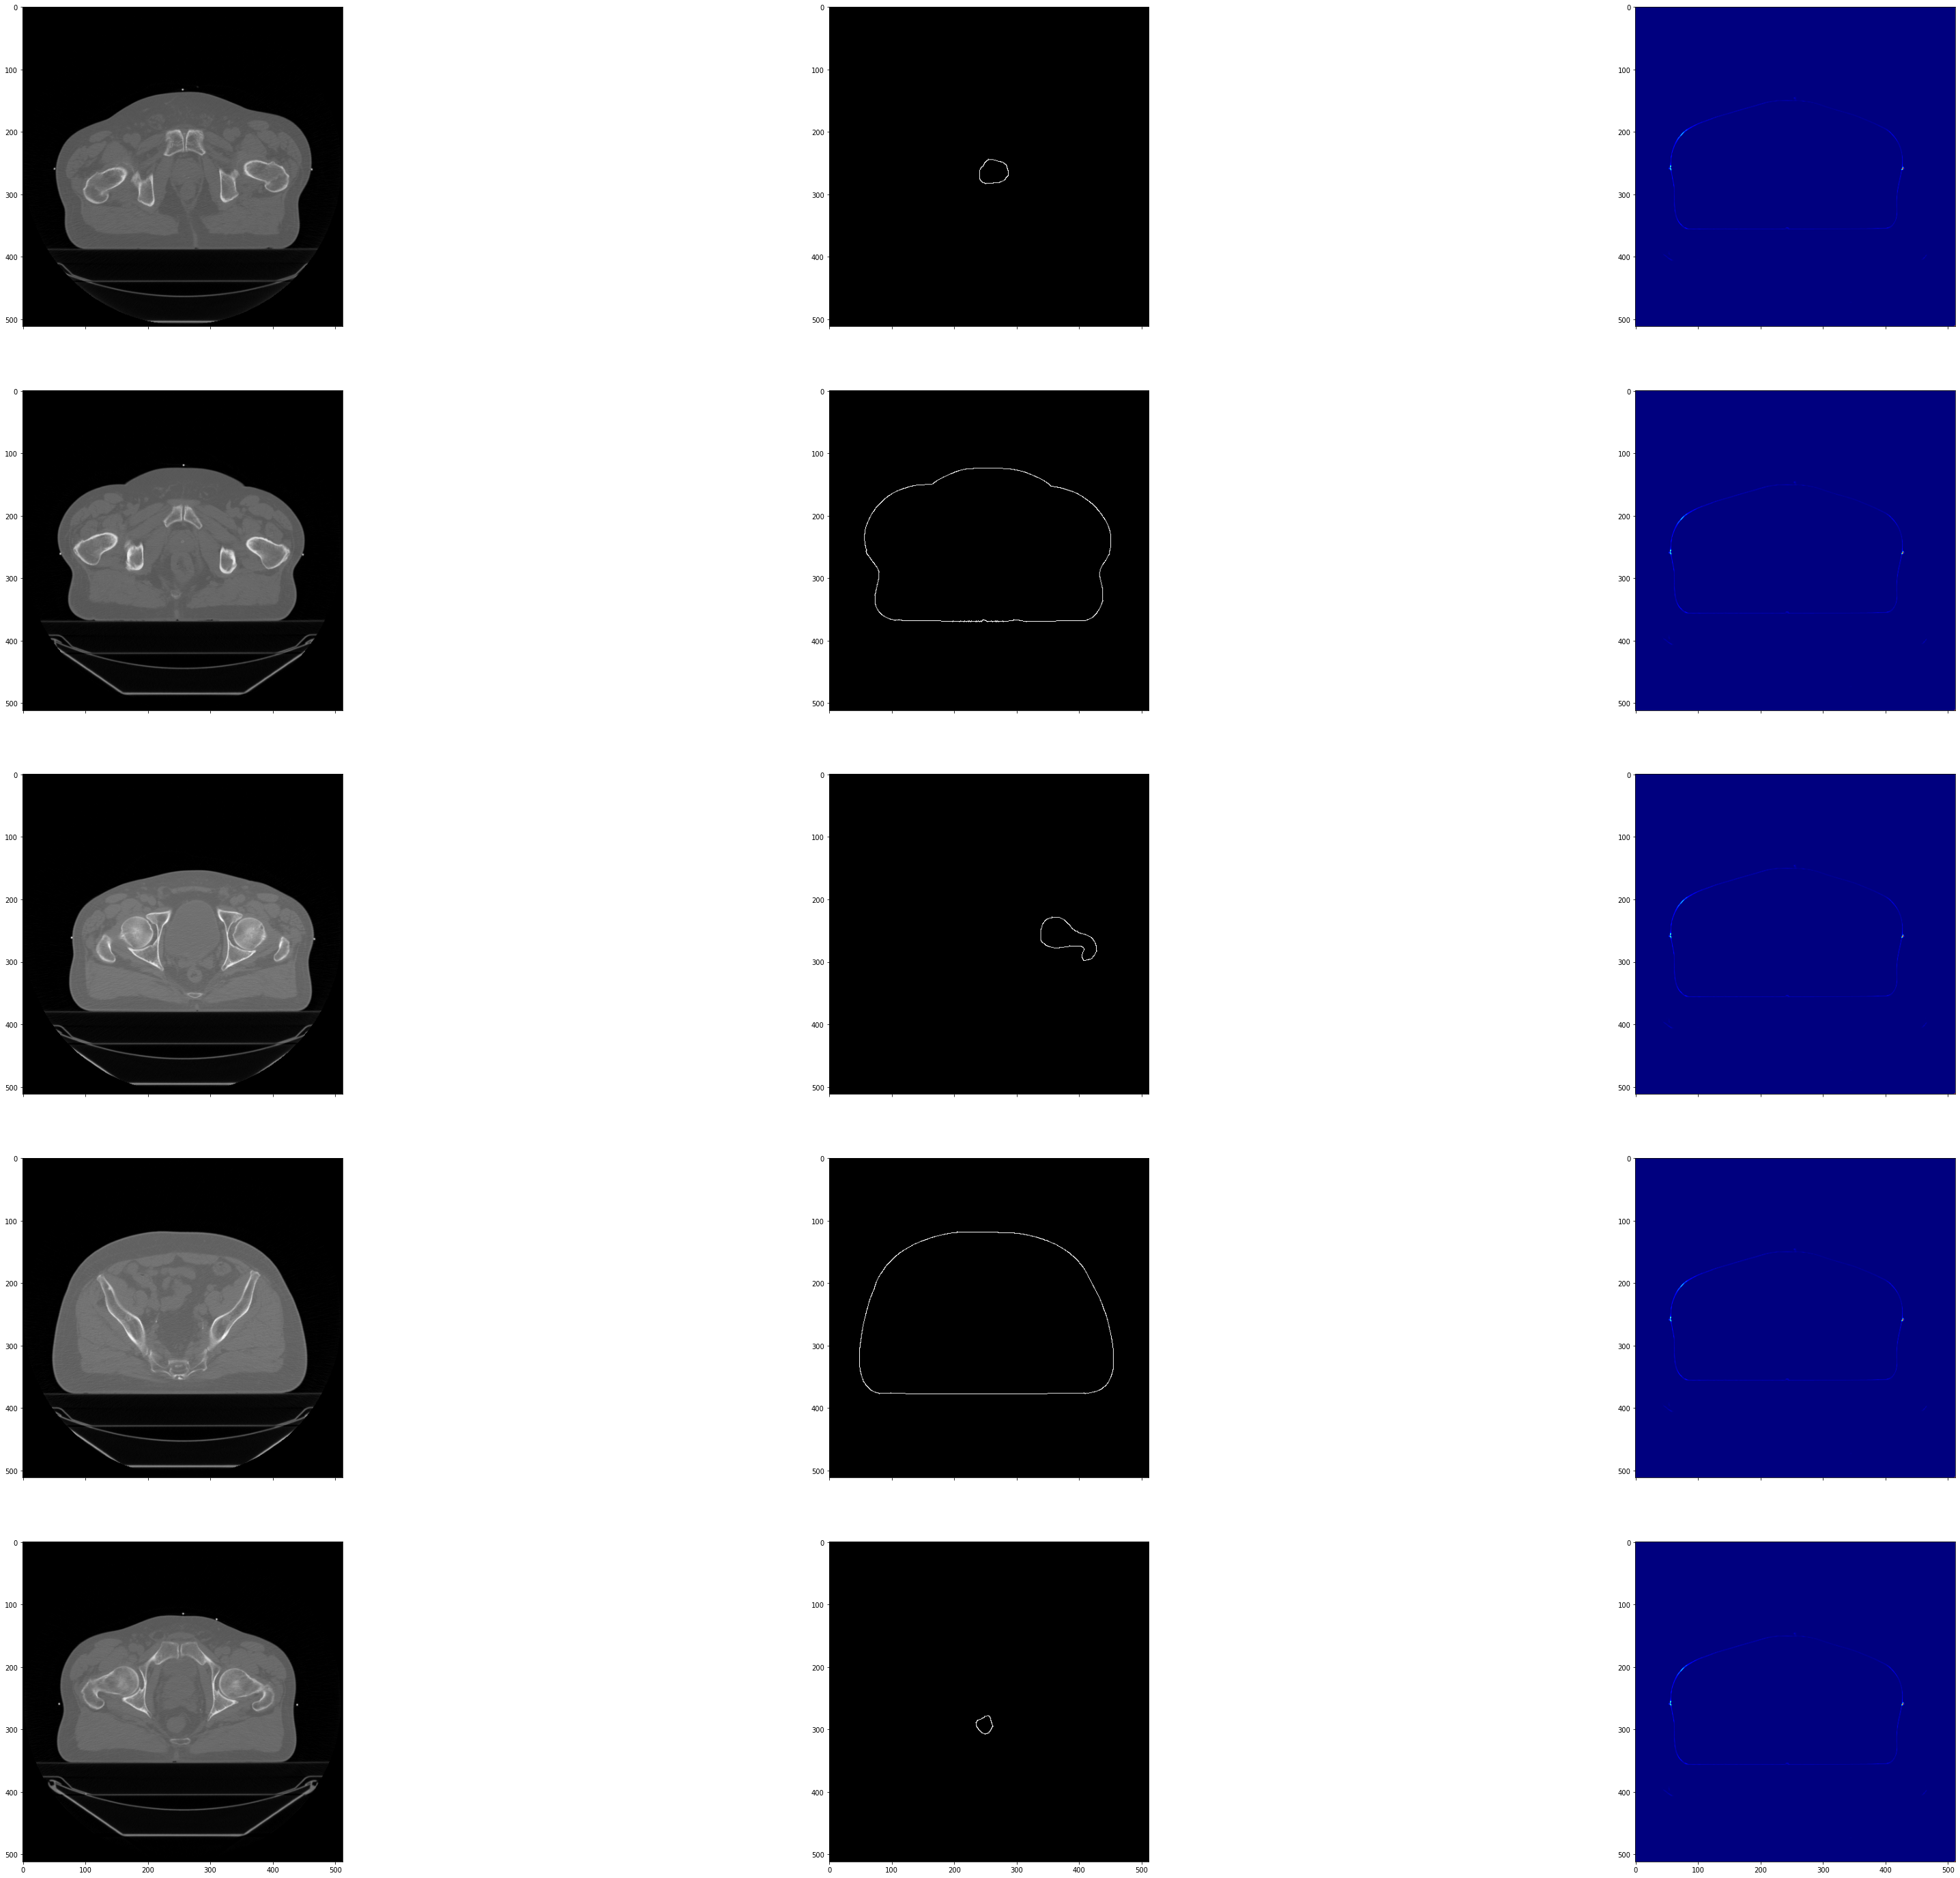

In [96]:
lines = max(5,len(image_mask_predictions))
fig, axarr = plt.subplots(lines, 3, figsize=(60,lines*10), sharex=True, sharey=False)

for i in range(0,lines):
    axarr[i,0].imshow(X_test[i], cmap='gray')
    axarr[i,1].imshow(y_test[i], cmap='gray')
    axarr[i,2].imshow(image_mask_predictions[0][:,:,6], cmap=plt.cm.jet)


In [56]:
import matplotlib.pyplot as plt

def ax_decorate_box(ax):
    [j.set_linewidth(0) for j in ax.spines.values()]
    ax.tick_params(axis="both", which="both", bottom=False, top=False, \
               labelbottom=False, left=False, right=False, labelleft=False)
    return ax